In [45]:
import numpy as np 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [46]:
#XOR
X = np.array([[0,0],
              [1,0],
              [0,1],
              [1,1]])
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [54]:
model = MLPClassifier(
    hidden_layer_sizes=(2,2),
    activation='logistic',
    learning_rate_init=1e-1,
    learning_rate='constant',
    max_iter=100000,
    batch_size='auto',
    tol=1e-12,
    early_stopping=False,
    verbose=True,
    #random_state=42,
    solver='sgd',
    n_iter_no_change=10000
).fit(X,y.reshape(len(y)))

model.predict(X)

Iteration 1, loss = 0.76417974
Iteration 2, loss = 0.75383304
Iteration 3, loss = 0.74108454
Iteration 4, loss = 0.72786130
Iteration 5, loss = 0.71578235
Iteration 6, loss = 0.70597480
Iteration 7, loss = 0.69900112
Iteration 8, loss = 0.69489457
Iteration 9, loss = 0.69327696
Iteration 10, loss = 0.69351888
Iteration 11, loss = 0.69490130
Iteration 12, loss = 0.69674828
Iteration 13, loss = 0.69851566
Iteration 14, loss = 0.69983445
Iteration 15, loss = 0.70051580
Iteration 16, loss = 0.70052859
Iteration 17, loss = 0.69996072
Iteration 18, loss = 0.69897401
Iteration 19, loss = 0.69776040
Iteration 20, loss = 0.69650508
Iteration 21, loss = 0.69535996
Iteration 22, loss = 0.69442851
Iteration 23, loss = 0.69376171
Iteration 24, loss = 0.69336281
Iteration 25, loss = 0.69319818
Iteration 26, loss = 0.69321114
Iteration 27, loss = 0.69333580
Iteration 28, loss = 0.69350886
Iteration 29, loss = 0.69367814
Iteration 30, loss = 0.69380720
Iteration 31, loss = 0.69387656
Iteration 32, los

c:\Users\Jason\Desktop\git_control\ml-research\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0, 1, 1, 0])

# Deep Network with Logistic Sigmoid activation

With activation function:

$\sigma(x)=\frac{1}{1+e^{(-x)}}$

Which is differentiable as:

$\sigma '(x)= \sigma(x) * (1 - \sigma(x))$

XOR data defined as:

$$
X = \begin{vmatrix}
    0 & 0 \\
    1 & 0 \\
    0 & 1 \\
    1 & 1 
    \end{vmatrix}  
$$
$$
y = \begin{vmatrix}
    0\\
    1\\
    1\\
    0
    \end{vmatrix}
$$

A network with one hidden layers, of dimension 2 and having bias is defined as:

$Z_1 = {X}\cdot{W_1}+{B_1} $  
$H = \sigma( Z_1 )$  
$Z_2 = {H}\cdot{W_2}+{B_2} $  
$\hat{y} = \sigma( Z_2 )$  

With weight matrices $W_1$ and $W_2$ randomly initialized with dimensions:

$dims(W_1) = 2*2$  
$dims(W_2) = 2*1$  

And bias vectors $B_1$ and $B_2$ randomly initialized with dimensions:

$dims(B_1) = 1*2$  
$dims(B_2) = 1*1$  

Solving the network using back propogation, having cost defined as:  

$C = .5*(\hat{y} - y)^{2}$  

Yields the gradient respecting the output layer activation:

$\delta _y = \frac{\delta C}{\delta \hat{y}} = (\hat{y} - y) * \sigma '({H}\cdot{W_2}+{B_2})$  

Gradients respecting the output layer weights and bias:

$\frac{\delta C}{\delta W_2} = H^T \cdot \delta _y $

$\frac{\delta C}{\delta B_2} = \delta _y $

The gradient respecting the hidden layer activation:

$\delta _H = \frac{\delta C}{\delta H} =  (\hat{y} - y) * \sigma '({H}\cdot{W_2}+{B_2}) \cdot W_2^T \cdot \sigma '( Z_1 ) = \delta _y \cdot W_2^T \cdot \sigma '( Z_1 )$

And the gradients respecting the hidden layer weights and biases:

$\frac{\delta C}{\delta W_1} = X^T \cdot \delta _H $

$\frac{\delta C}{\delta B_1} = \delta _H $


In [39]:

def relu(x,w,b):
	y = x@w + b
	return np.where(y>0,y,0)

def d_relu(x,w,b):
	return np.where(relu(x,w,b)>0,1,0)

def sigmoid(x,w,b):
	return 1/np.float64(1+np.exp(-(x@w + b)))

def d_sigmoid(x,w,b):
	return sigmoid(x,w,b)*(1 - sigmoid(x,w,b))

def d2_sigmoid(x,w,b):
	return d_sigmoid(x,w,b) - (2*sigmoid(x,w,b)*d_sigmoid(x,w,b))

def createweights(s):
	layers=len(s)
	layer=0
	weights=[]
	while layer<layers-1:
		w=np.random.normal(0,.1,(s[layer],s[layer+1]))
		#w=np.zeros((s[layer],s[layer+1]))
		weights.append(w)
		layer=layer+1
	return weights
	
def createbias(s):
	layers=len(s)
	layer=0
	bias=[]
	while layer<layers-1:
		w=np.random.normal(0,.1,(s[layer+1]))
		#w=np.ones((s[layer+1]))
		bias.append(w)
		layer=layer+1
	return bias
	
def predict(train,weights,bias,s):
	layers=len(s)
	layer=0
	inputs=[train]
	while layer<layers-1:
		if layer==layers-2:
			activation = sigmoid
		else:
			activation = relu
		pred=activation(inputs[layer],weights[layer],bias[layer])
		inputs.append(pred)
		layer=layer+1
	return inputs

def backprop(inputs,y, weights,bias, s,lr=.01):

	layers=len(s)
	layer=layers-1
	d_out=inputs[layer]-y

	weights_new = weights
	bias_new = bias

	gradients_weight = []
	gradients_bias = []

	while layer>0:

		if layer == layers - 1:
			deriv = d_sigmoid
		else:
			deriv = d_relu

		input_values=inputs[layer-1]

		d_out = (d_out * deriv(input_values,weights[layer-1],bias[layer-1]))

		grad_weights = input_values.T@d_out 
		grad_bias = np.sum(d_out,axis=0)

		weights_new[layer-1]=weights[layer-1]-lr*grad_weights.reshape(weights[layer-1].shape)
		bias_new[layer-1]=bias[layer-1]-lr*grad_bias.reshape(bias[layer-1].shape)

		gradients_weight.append(grad_weights)
		gradients_bias.append(grad_bias)

		d_out = d_out@weights[layer-1].T

		layer -= 1

	return weights_new,bias_new,gradients_weight,gradients_bias




In [40]:

	
s=[2,2,1]
weights=createweights(s=s)
bias=createbias(s=s)		

weights

[array([[ 0.20296936, -0.00991895],
        [-0.011923  ,  0.07141482]]),
 array([[ 0.01814439],
        [-0.03606951]])]

2.000487355310857
2.0000003230052013
2.0000244932407236
2.0000001913734464
2.0000001446742024
2.000000108338535
2.0000000806068554
2.00000005972253
2.000000044141758
2.0000000325948717
2.000000024078049
2.000000017817426
2.0000000132263804
2.000000009865345
2.0000000074075985
2.0000000056116836
2.0000000042998844
2.000000003341783
2.0000000026418734
2.0000000021303252
2.000000001756135
2.0000000014820802
2.0000000012810117
2.0000000011331376
2.0000000010240297
2.0000000009431753
2.000000000882915
2.0000000008376677
2.000000000803369
2.0000000007770558
2.0000000007565717
2.0000000007403447
2.00000000072723
2.0000000007163936
2.000000000707227
2.000000000699289
2.000000000692255
2.0000000006858913
2.000000000680026
2.000000000674534
2.0000000006693237
2.0000000006643295
2.0000000006595022
2.000000000654807
2.0000000006502177
2.0000000006457146
2.0000000006412844
2.0000000006369163
2.0000000006326033
2.000000000628339
2.000000000624121
2.000000000619945
2.0000000006158083
2.00000000061171

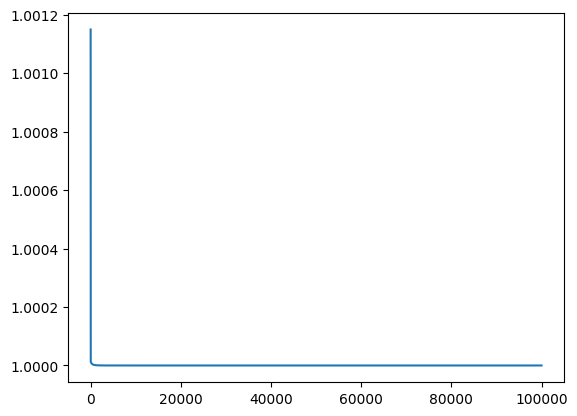

In [44]:

	
s=[2,2,1]
weights=createweights(s=s)
bias=createbias(s=s)		

w1 = []
w2 = []
b1 = []
b2 = []

grad_w_l1 = []
grad_w_l2 = []

grad_b_l1 = []
grad_b_l2 = []

errs = []
grad_errs = []
for i in range(100000):
    inputs=predict(X,weights, bias,s=s)
    errs.append(np.sum((inputs[-1]-y)**2))

    g_err = (inputs[-1]-y).T@d_sigmoid(inputs[-2],weights[-1],bias[-1])

    grad_errs.append(g_err)

    w1.append(weights[0])
    w2.append(weights[1])

    b1.append(bias[0])
    b2.append(bias[1])

    print(np.sum(abs(inputs[-1]-y)))
    weights_new,bias_new,gradients_weight,gradients_bias=backprop(inputs,y, weights, bias, s=s,lr=1e0)
    grad_w_l1.append(gradients_weight[1])
    grad_w_l2.append(gradients_weight[0])
    grad_b_l1.append(gradients_bias[1])
    grad_b_l2.append(gradients_bias[0])

    if np.sum((inputs[-1]-y)**2)<.01:
        break


plt.plot(errs)


In [42]:
predict(X,weights, bias,s=s)

[array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([[0.        , 0.10004274],
        [0.        , 0.19164377],
        [0.        , 0.04725769],
        [0.        , 0.13885872]]),
 array([[0.49999969],
        [0.50000114],
        [0.49999885],
        [0.5000003 ]])]

In [ ]:
weights1_array = np.concatenate(w1).reshape(len(w1),2,2)
weights2_array = np.concatenate(w2).reshape(len(w2),2)

bias1_array = np.concatenate(b1).reshape(len(b1),2)
bias2_array = np.concatenate(b2).reshape(len(b2))

grad_weights1_array = np.concatenate(grad_w_l1).reshape(len(grad_w_l1),2,2)
grad_weights2_array = np.concatenate(grad_w_l2).reshape(len(grad_w_l2),2)
grad_bias1_array = np.concatenate(grad_b_l1).reshape(len(grad_b_l1),2)
grad_bias2_array = np.concatenate(grad_b_l2).reshape(len(grad_b_l2))


In [ ]:
errs_array = np.array(errs)
grad_array = np.array(grad_errs)

In [ ]:
grad_array = grad_array.reshape(len(grad_array))

The point in optimization where a solution is discovered and rapidly approached can be observed in the first difference of the cost. Prior to this event, the cost improves so little that it appears as though convergence may be reached, and termination criteria might wrongly terminate the algorithm and assume convergence.

In [ ]:

def custom_error_plot(fr,to):
    fig,axs = plt.subplots(3,sharex=True,figsize=(8,8))
    axs[0].plot(errs_array[fr:to])
    axs[1].plot(grad_array[fr:to])
    axs[0].set_ylabel('Cost', size=13,labelpad=10)
    axs[1].set_ylabel('Cost First Gradient', size=13,labelpad=10)
    axs[2].set_ylabel('Cost Second Gradient', size=13,labelpad=10)
    fig.suptitle('Cost Convergence: Finding the Point\nWhere a Solution is Reached')
    fig.align_ylabels()
    plt.plot()

def custom_plot(fr,to):

    fig,axs = plt.subplots(9,3,sharex=True,figsize=(17,12))
    axs[0,0].set_ylabel('w_(2,1)', size=13,labelpad=10)
    axs[1,0].set_ylabel('w_(2,2)', size=13,labelpad=10)
    axs[2,0].set_ylabel('w_(1,1,1)', size=13,labelpad=10)
    axs[3,0].set_ylabel('w_(1,1,2)',size=13,labelpad=10)
    axs[4,0].set_ylabel('w_(1,2,1)',size=13,labelpad=10)
    axs[5,0].set_ylabel('w_(1,2,2)', size=13,labelpad=10)
    axs[6,0].set_ylabel('b_(2)', size=13,labelpad=10)
    axs[7,0].set_ylabel('b_(1,1)', size=13,labelpad=10)
    axs[8,0].set_ylabel('b_(1,2)', size=13,labelpad=10)

    axs[0,0].set_title('Parameter Value', size=13)
    axs[0,1].set_title('Gradient Value', size=13)
    axs[0,2].set_title('First Difference of Gradient Value', size=13)

    axs[0,0].plot(weights2_array[:,0][fr:to])
    axs[1,0].plot(weights2_array[:,1][fr:to])
    axs[2,0].plot(weights1_array[:,0,0][fr:to])
    axs[3,0].plot(weights1_array[:,0,1][fr:to])
    axs[4,0].plot(weights1_array[:,1,0][fr:to])
    axs[5,0].plot(weights1_array[:,1,1][fr:to])
    axs[6,0].plot(bias2_array[fr:to])
    axs[7,0].plot(bias1_array[:,0][fr:to])
    axs[8,0].plot(bias1_array[:,1][fr:to])

    axs[0,1].plot(grad_weights2_array[:,0][fr:to])
    axs[1,1].plot(grad_weights2_array[:,1][fr:to])
    axs[2,1].plot(grad_weights1_array[:,0,0][fr:to])
    axs[3,1].plot(grad_weights1_array[:,0,1][fr:to])
    axs[4,1].plot(grad_weights1_array[:,1,0][fr:to])
    axs[5,1].plot(grad_weights1_array[:,1,1][fr:to])
    axs[6,1].plot(grad_bias2_array[fr:to])
    axs[7,1].plot(grad_bias1_array[:,0][fr:to])
    axs[8,1].plot(grad_bias1_array[:,1][fr:to])

    axs[0,2].plot(np.diff(grad_weights2_array[:,0])[fr:to])
    axs[1,2].plot(np.diff(grad_weights2_array[:,1])[fr:to])
    axs[2,2].plot(np.diff(grad_weights1_array[:,0,0])[fr:to])
    axs[3,2].plot(np.diff(grad_weights1_array[:,0,1])[fr:to])
    axs[4,2].plot(np.diff(grad_weights1_array[:,1,0])[fr:to])
    axs[5,2].plot(np.diff(grad_weights1_array[:,1,1])[fr:to])
    axs[6,2].plot(np.diff(grad_bias2_array)[fr:to])
    axs[7,2].plot(np.diff(grad_bias1_array[:,0])[fr:to])
    axs[8,2].plot(np.diff(grad_bias1_array[:,1])[fr:to])

    fig.suptitle('Observing Convergence: Gradients Approaching Zero\nBefore and After Solution Event', size=16)
    #plt.sca(axs[8,2])
    #plt.xticks(range(to-fr), list(range(fr,to)), color='red')
    fig.align_ylabels()

    plt.tight_layout()
    plt.show()
    return


In [ ]:

fr = 0
to = 50000

custom_error_plot(fr,to)
custom_plot(fr,to)

In [ ]:
fr,to = 0,200

custom_error_plot(fr,to)
custom_plot(fr,to)

In [ ]:
fr,to = 0,50000

custom_error_plot(fr,to)
custom_plot(fr,to)

In [ ]:

custom_error_plot(20,10000)

In [ ]:
custom_error_plot(15000,22000)